<a href="https://colab.research.google.com/github/Jainadi2128/Python-Projects/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
%matplotlib inline
import pandas as pd

In [19]:
digits = load_digits()

In [15]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


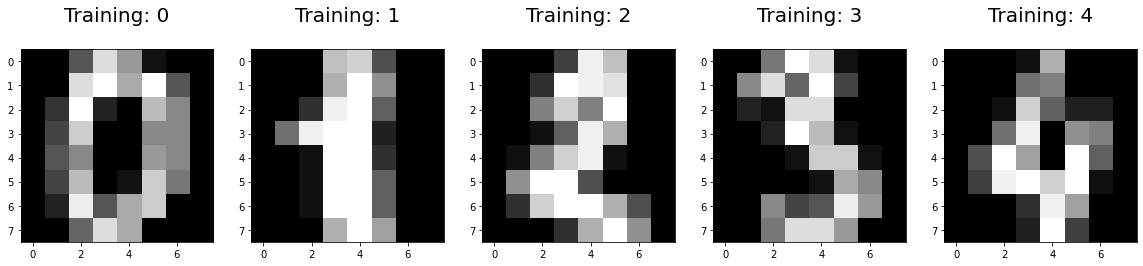

In [20]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
  plt.subplot(1, 5 , index + 1)
  plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize=20)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.23,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1383, 64)
(414, 64)
(1383,)
(414,)


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
Log_Reg = LogisticRegression()
Log_Reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
Log_Reg.predict(X_test[0].reshape(1,-1))

array([4])

In [29]:
predictions = Log_Reg.predict(X_test)

In [32]:
score = Log_Reg.score(X_test, y_test)
print(score)

0.9516908212560387


In [39]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 30]])

Text(0.5, 1.0, 'Accuracy Score: [0]')

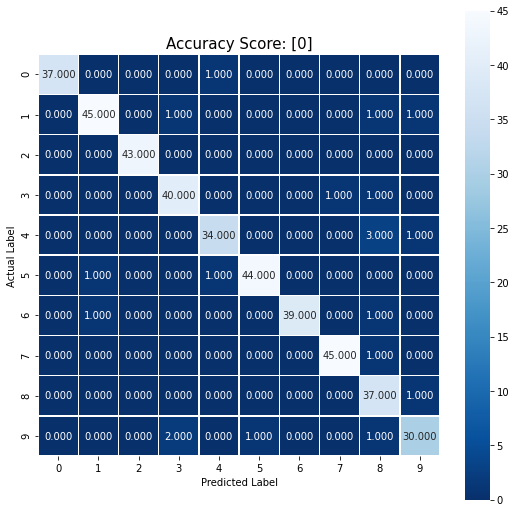

In [40]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score: [0]'.format(score)
plt.title(all_sample_title, size=15)